# 2 Multiple Hidden Layer Neural network
<p>We'll implement a N Hidden Layer Neural network.</p>
<ul>
    <li><a href="#data">Data</a></li>
    <li><a href="#model">Create the Model and Loss function: Cross Entropy</a></li>
    <li><a href="#training">Training</a></li>
    <li><a href="#results">Results</a></li>
</ul>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [2]:
# Helper function: plotting
def get_hist(model,data_set):
    activations=model.activation(data_set.x)
    for i,activation in enumerate(activations):
        plt.hist(activation.numpy(),4,density=True)
        plt.title("Activation layer " + str(i+1))
        plt.xlabel("Activation")
        plt.xlabel("Activation")
        plt.legend()
        plt.show()
        
def PlotStuff(X,Y,model=None,leg=False):    
    plt.plot(X[Y==0].numpy(),Y[Y==0].numpy(),'or',label='training points y=0 ' )
    plt.plot(X[Y==1].numpy(),Y[Y==1].numpy(),'ob',label='training points y=1 ' )
    plt.xlabel('x')
    if model!=None:
        plt.plot(X.numpy(),model(X).detach().numpy(),label='NN ')

    plt.legend()
    plt.show()

## <a name="data" id="data">Data</a>

In [3]:
class Data(Dataset):
    def __init__(self):
        self.x=torch.linspace(-20, 20, 100).view(-1,1)
  
        self.y=torch.zeros(self.x.shape[0])
        self.y[(self.x[:,0]>-10)& (self.x[:,0]<-5)]=1
        self.y[(self.x[:,0]>5)& (self.x[:,0]<10)]=1
        self.y=self.y.view(-1,1)
        self.len=self.x.shape[0]
    def __getitem__(self,index):    
            
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

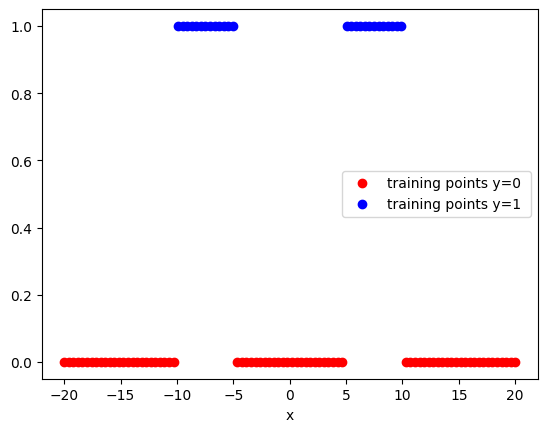

In [4]:
data_set=Data()
PlotStuff(data_set.x,data_set.y,leg=False)

## <a name="model" id="model">Model: Neural network and loss criterion</a>

In [5]:
# Define the activations and the output of the first linear layer as an attribute. Note that this is not good practice. 
class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)

    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=torch.sigmoid(self.linear2(x))
        return x

In [6]:
# Define the Neural Network, Criterion, and Optimizer:
torch.manual_seed(0)

# NN: 9 neurons in the hidden layer. Loss: BCE. Optimizer: Adam.
model=Net(1,9,1)

learning_rate=0.1
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

train_loader=DataLoader(dataset=data_set,batch_size=100)

## <a name="training" id="training">Training</a>
**May take a few minutes**

In [7]:
# Define the training function
def train(data_set,model,criterion, train_loader, optimizer, epochs=5,plot_number=10):
    cost=[]
    
    for epoch in range(epochs):
        total=0
        
        for x,y in train_loader:
            optimizer.zero_grad()
            
            yhat=model(x)
            loss=criterion(yhat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total+=loss.item()
            
        if epoch%plot_number==0:
            PlotStuff(data_set.x,data_set.y,model)
        
        cost.append(total)
    plt.figure()
    plt.plot(cost)
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.show()
    return cost

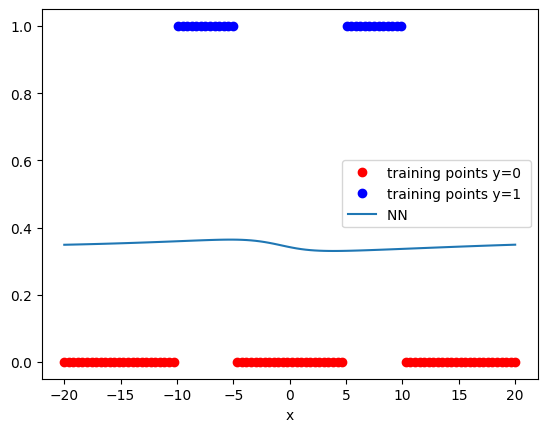

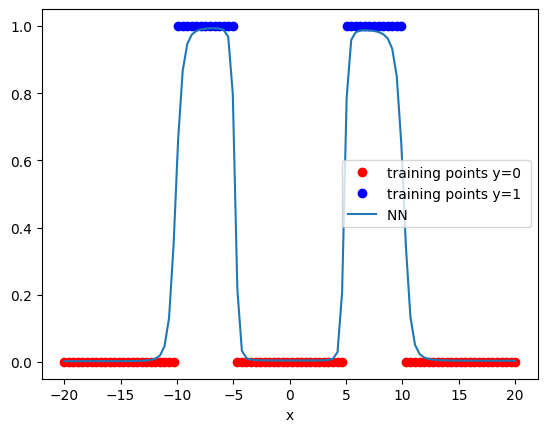

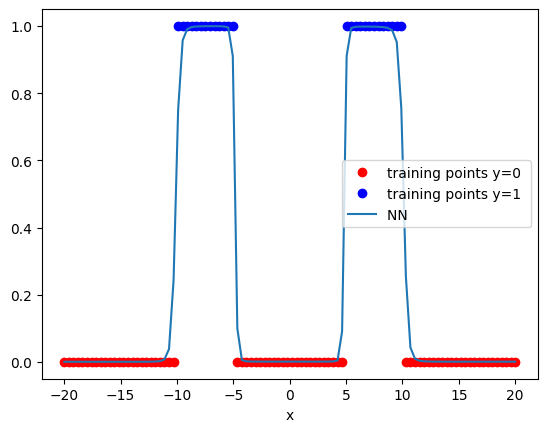

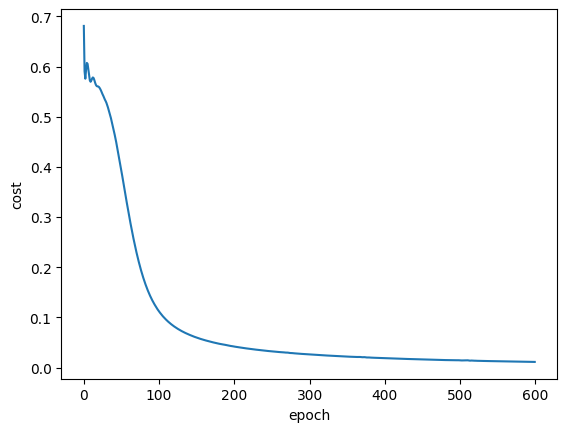

In [8]:
COST = train(data_set,model,criterion, train_loader, optimizer, epochs=600,plot_number=200)

## <a name="results" id="results">Results</a>

Text(0.5, 1.0, 'loss')

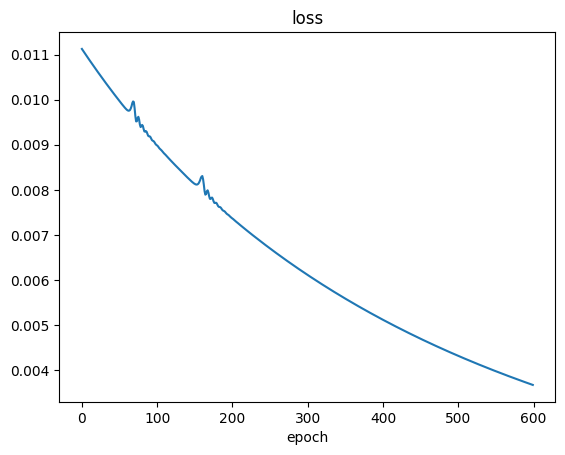

In [ ]:
# Plot the loss
plt.plot(COST)
plt.xlabel('epoch')
plt.title('loss')

When observing the `activation` curves, it can be seen that at the 600th epoch the data is mapped into a linearly separable space.